<a href="https://colab.research.google.com/github/jBarrios26/SP1_ML/blob/main/tarea3/FashionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 3: Usando una red neuronal para categorizar items de ropa
### Jorge Barrios - 18001175 

En este laboratorio se va a construir una red neuronal que categorice varios items de ropa que provienen del dataset de tensorflow fashion_mnist

In [31]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt
import PIL.Image as Image



seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

'''
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Funciones de ayuda

In [32]:
def show_image(image, label):
  plt.imshow(image)
  plt.title(fashion_classes[label])
  plt.axis(False)
  plt.show()

def show_images (images, labels):
  plt.figure(figsize=(15,15))
  i = 0
  for image in images:
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(fashion_classes[labels[i]])
    i += 1 
  plt.show()

# Dataset de imágenes de ropa 

Importar las imagenes y realizar las transformaciones necesarias. 

In [33]:
from tensorflow.keras.datasets import fashion_mnist

In [34]:
### Descargar las imagenes
(training_images, training_labes), (testing_images, testing_labels) = fashion_mnist.load_data();

In [35]:
# Normalizar las imagenes
(training_images) = training_images / 255.0
testing_images = testing_images / 255.0 

# Visualizar imagenes.

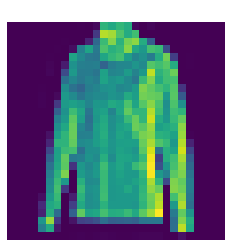

In [36]:

index = np.random.randint(training_images.shape[0])
show_image(training_images[index], training_labes[index])

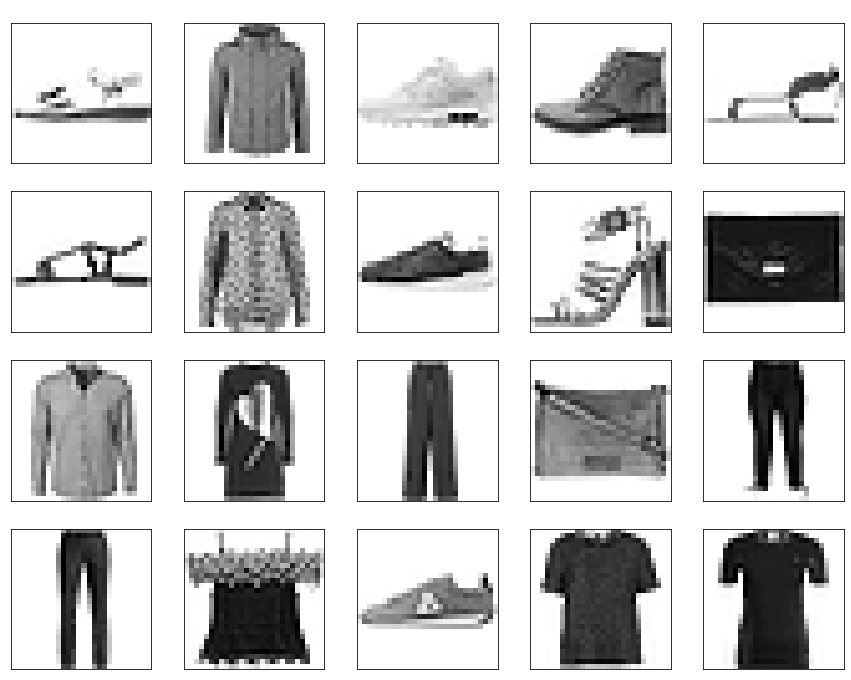

In [37]:
index = np.random.randint(training_images.shape[0])
show_images(training_images[index: index + 20], training_labes[index: index + 20])

# La Red Neuronal

In [38]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation='softmax')
                             ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 20

In [40]:
history = model.fit(training_images, 
                    training_labes, 
                    validation_split=0.2,
                    epochs = epochs)


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6655 - accuracy: 0.7716 - val_loss: 0.4363 - val_accuracy: 0.8431
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3996 - accuracy: 0.8588 - val_loss: 0.3771 - val_accuracy: 0.8671
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3474 - accuracy: 0.8738 - val_loss: 0.4362 - val_accuracy: 0.8414
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3337 - accuracy: 0.8782 - val_loss: 0.3476 - val_accuracy: 0.8748
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3002 - accuracy: 0.8906 - val_loss: 0.3354 - val_accuracy: 0.8794
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.8947 - val_loss: 0.3378 - val_accuracy: 0.8805
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.8997 - val_loss: 0.3417 - val_accuracy:

# Probar  el modelo

In [47]:
model.evaluate(testing_images, testing_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8850


[0.3684445917606354, 0.8849999904632568]

In [48]:
### Mostrar una predicción
classifications = model.predict(testing_images)
print(classifications[0])

[2.7943243e-09 5.8733140e-12 1.4571903e-11 8.8945485e-13 7.3785422e-12
 9.7373559e-06 5.9858323e-08 8.2014204e-04 4.8440474e-11 9.9917006e-01]


#Visualizando algunas predicciones

En el titulo de la foto se encuentra la clase que predice el modelo

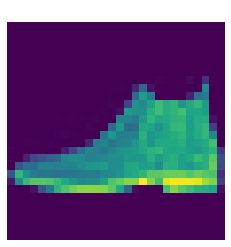

In [49]:
index = np.argmax(classifications[0])
show_image(testing_images[0], index)

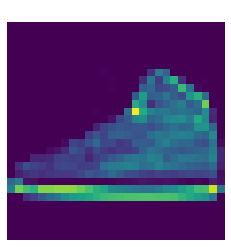

In [50]:
index = np.argmax(classifications[45])
show_image(testing_images[45], index)

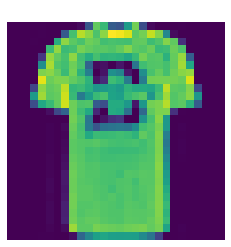

In [51]:
index = np.argmax(classifications[2888])
show_image(testing_images[2888], index)

# Visualizando estadisticas.

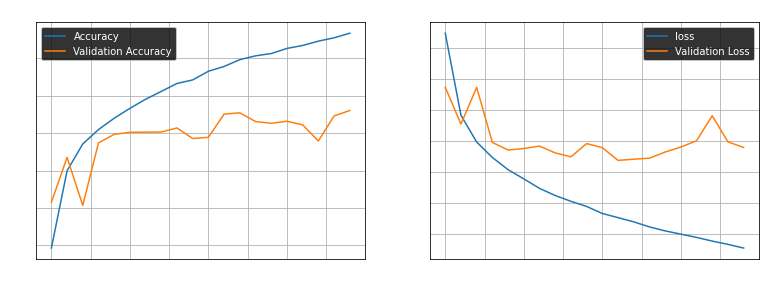

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(4, 3, 1)
plt.plot(range(epochs), history.history['accuracy'], label='Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.grid()
plt.legend(facecolor='black')
plt.title('Accuracy and Validation Accuracy')

plt.subplot(4, 3, 2)
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.title('Loss and Validation Loss')
plt.legend(facecolor='black')
plt.show()

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 


In [58]:
y_pred_class = np.argmax(model.predict(testing_images), axis=1)

cf_matrix = confusion_matrix(testing_labels, y_pred_class)

print(f'Confusion Matrix\n{cf_matrix}')

report = classification_report(testing_labels, 
                               y_pred_class, 
                               target_names=fashion_classes)
print(f'Classification Report\n{report}')

Confusion Matrix
[[875   2  18  17   4   1  80   0   3   0]
 [  9 962   1  22   2   0   4   0   0   0]
 [ 16   0 800   8  96   1  79   0   0   0]
 [ 41   2  14 888  22   0  31   0   2   0]
 [  1   1  81  44 819   0  54   0   0   0]
 [  0   1   0   1   0 958   0  24   2  14]
 [166   0  67  28  65   0 670   0   4   0]
 [  0   0   0   0   0  14   0 970   0  16]
 [  8   0   7   4   6   2   8   3 962   0]
 [  0   0   0   0   0  11   1  42   0 946]]
Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.88      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.81      0.80      0.80      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.81      0.82      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.72      0.67      0.70      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.99      0.96      0.98

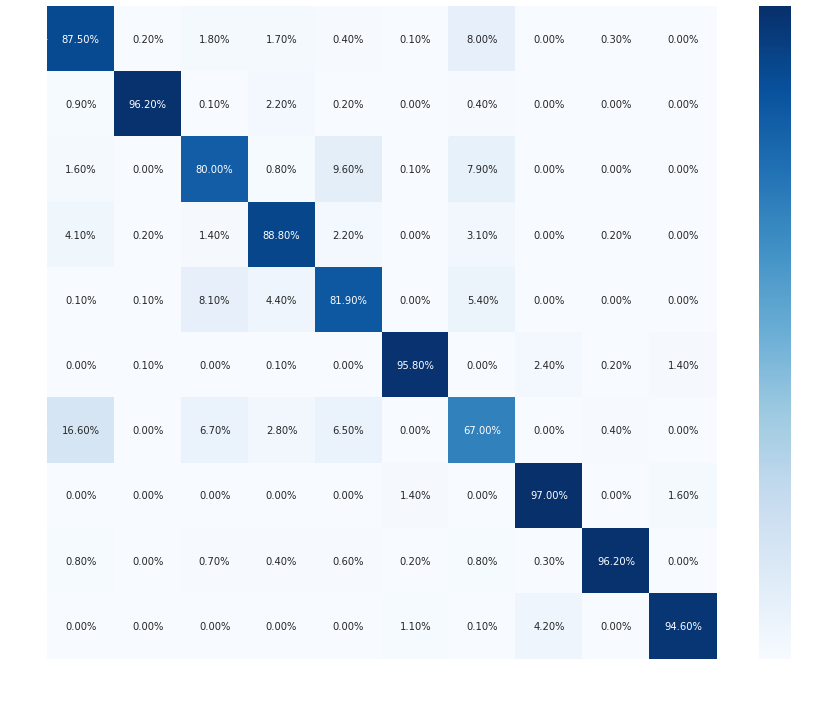

In [60]:

plt.figure(figsize=(15,12))
ax = sns.heatmap(cf_matrix/(np.sum(cf_matrix)/len(cf_matrix)), annot=True, 
            fmt='.2%', cmap='Blues',
            yticklabels=fashion_classes, 
            xticklabels=fashion_classes)

ax.set_xlabel('Predicted label', fontsize=20)
ax.set_ylabel('True label', fontsize=20)

plt.show()

# Ejercicios 
## Ejercicio 1
1. Es la probabilidad que tiene la imagen de pertenecer a cada una de las 10 clases. 
2. La bota tiene la etiqueta 9, y hay 0->9 elementos en la lista. 

## Ejercicio 2 
1. Toma más tiempo y el accuracy mejora un poco. 

## Ejercicio 3
1. Sale un error porque el shape de la entrada es diferente a lo que espera la primera capa de la red neuronal. 

## Ejercicio 4 
1. Hay 10 neuronas de salida porque hay 10 tipos de clases distintas. 

## Ejercicio 5
1. No hay un gran impacto. 

## Ejercicio 6 
1. Aumentar las epochs puede causar que aparezca el overfitting. 

## Ejercicio 7 
1. Si no se normalizan las imagenes el entrenamiento de la red tarda más tiempo. 

## Ejercicio 8
1. Se pueden utilizar callbacks para terminar la ejecución del entrenamiento si se cumple una condición o para crear reportes del entrenamiento. 